# Improved Model

Three ways to improve the model:

1. Decrease the columns.

2. Add several new features and give relatively high weight: words number, words length, repeat time and protantity percentage.

->a.Base on words format

->b.Base on words meaning

3. Change the key parameters of SVC.

->a.Change the kernel

->b.Change the penalty C.




In [7]:
import pandas as pd
import nltk
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.multiclass import OneVsOneClassifier
import os 
import sys
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1. Decrease the columns


we first take the big step (500) from 4800 to 100.

In [31]:
score=[]
for i in range(4800,100,-500):
    df_svm_pp=pd.read_csv("svm_table.csv")
    col_name_new = df_svm_pp.columns.tolist()
    col_name2=col_name_new[3:-1]
    X=df_svm_pp.reindex(columns=col_name2)
    X=X.iloc[:,0:i]
    y=df_svm_pp['tag.1']
    [X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=.4,random_state=0)
    y_pred=OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train).predict(X_test)
    score.append([i,metrics.accuracy_score(y_test, y_pred)])

In [33]:
score

[[4800, 0.7198869223205506],
 [4300, 0.7211160275319567],
 [3800, 0.7227138643067846],
 [3300, 0.7234513274336283],
 [2800, 0.7244346116027532],
 [2300, 0.7246804326450345],
 [1800, 0.7260324483775811],
 [1300, 0.2616764995083579],
 [800, 0.262905604719764],
 [300, 0.29510816125860373]]

Text(0.5,1,'Finding the Beast Accuracy Score by Decreasing the Columns')

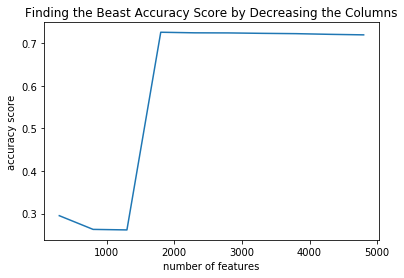

In [41]:
x=[]
y=[]
for i in range(len(score)):
    x.append(score[i][0])
    y.append(score[i][1])
plt.plot(x,y)
plt.xlabel("number of features")
plt.ylabel("accuracy score")
plt.title("Finding the Beast Accuracy Score by Decreasing the Columns")

Then we take the small step of 100, from 2300 to 1300.

In [42]:
score=[]
for i in range(2300,1300,-100):
    df_svm_pp=pd.read_csv("svm_table.csv")
    col_name_new = df_svm_pp.columns.tolist()
    col_name2=col_name_new[3:-1]
    X=df_svm_pp.reindex(columns=col_name2)
    X=X.iloc[:,0:i]
    y=df_svm_pp['tag.1']
    [X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=.4,random_state=0)
    y_pred=OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train).predict(X_test)
    score.append([i,metrics.accuracy_score(y_test, y_pred)])

In [44]:
score

[[2300, 0.7246804326450345],
 [2200, 0.7250491642084562],
 [2100, 0.7271386430678466],
 [2000, 0.7267699115044248],
 [1900, 0.7246804326450345],
 [1800, 0.7260324483775811],
 [1700, 0.262905604719764],
 [1600, 0.26327433628318586],
 [1500, 0.26474926253687314],
 [1400, 0.25995575221238937]]

Text(0.5,1,'Finding the Beast Accuracy Score between 1400 to 2300 features')

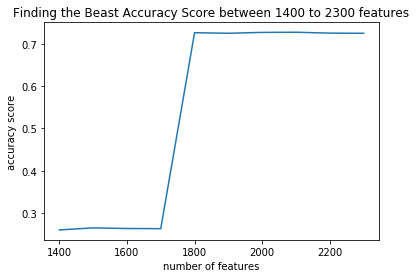

In [45]:
x=[]
y=[]
for i in range(len(score)):
    x.append(score[i][0])
    y.append(score[i][1])
plt.plot(x,y)
plt.xlabel("number of features")
plt.ylabel("accuracy score")
plt.title("Finding the Beast Accuracy Score between 1400 to 2300 features")

So we take n=2100 as the best features.

# 2. new features

# a. bese on words fromat

In [62]:
df_svm_pp=pd.read_csv("svm_table.csv")
df_svm_pp.head()
col_name_new = df_svm_pp.columns.tolist()
col_name2=col_name_new[2:2101]
X=df_svm_pp.reindex(columns=col_name2)
y=df_svm_pp['tag.1']
y.head()

0    1
1    1
2    5
3    1
4    0
Name: tag.1, dtype: int64

In [63]:
df_newfea=pd.read_csv("new_features.csv")
df_newfea=df_newfea.drop(['count_of_words'], axis=1)
df_svm_ad=X.merge(df_newfea,on='track_id',how='left')
col_name_new = df_svm_ad.columns.tolist()
col_name2=col_name_new[-3:]+col_name_new[1:2099]
X=df_svm_ad.reindex(columns=col_name2)
X.head()

,sum_of_words,repeat_times,lenword,like,know,get,love,got,go,time,...,commit,parad,defeat,ganz,correct,industri,visit,dove,driver,model
0,269,2.279661,4.194915,7,4,1,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,180,2.686567,4.402985,2,8,4,0,1,0,5,...,0,0,0,0,0,0,0,0,0,0
2,391,1.622407,4.464730,4,4,5,6,0,2,4,...,1,0,0,0,1,0,0,0,0,1
3,278,1.470899,4.243386,4,3,2,0,4,0,2,...,0,0,0,0,0,0,0,0,1,0
4,175,1.576577,4.531532,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=.4,random_state=0)
y_pred=OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train).predict(X_test)
score=metrics.accuracy_score(y_test, y_pred)
score

0.8661504424778761

# b. base on words meaning

peoduce a new table for the following step.

In [88]:
df_svm_pp=pd.read_csv("svm_table.csv")
df_svm_pp.head()
col_name_new = df_svm_pp.columns.tolist()
col_name2=col_name_new[2:2101]
X=df_svm_pp.reindex(columns=col_name2)
y=df_svm_pp['tag.1']
y.head()

0    1
1    1
2    5
3    1
4    0
Name: tag.1, dtype: int64

In [89]:
df_newfea=pd.read_csv("new_features.csv")
df_pro=pd.read_csv("songs_merged_profanity.csv")
df_newfea=df_newfea.drop(['count_of_words'], axis=1)
df_pro_clean=df_pro[['track_id','prof_percen']]
df_svm_ad=X.merge(df_newfea,on='track_id',how='left')
df_svm_ad=df_svm_ad.merge(df_pro_clean,on='track_id',how='left')
col_name_new = df_svm_ad.columns.tolist()
col_name2=col_name_new[0:1]+col_name_new[-4:]+col_name_new[1:2099]
X=df_svm_ad.reindex(columns=col_name2)
X.to_csv('svm_new_features.csv',index=False)

/Users/YIJIE/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,5,6,7,8,12,13,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,sum_of_words,repeat_times,lenword,prof_percen,like,know,get,love,got,...,commit,parad,defeat,ganz,correct,industri,visit,dove,driver,model
0,TRXPGWF128F428F1F7,269,2.279661,4.194915,0.096654,7,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,TRGGQAW128F427F470,180,2.686567,4.402985,0.000000,2,8,4,0,1,...,0,0,0,0,0,0,0,0,0,0
2,TRYASIL128F147089D,391,1.622407,4.464730,0.000000,4,4,5,6,0,...,1,0,0,0,1,0,0,0,0,1
3,TRAKYTI128C7196464,278,1.470899,4.243386,0.007194,4,3,2,0,4,...,0,0,0,0,0,0,0,0,1,0
4,TRZNWRQ128F9307622,175,1.576577,4.531532,0.000000,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
X=X.iloc[:,1:]
X.head()

,sum_of_words,repeat_times,lenword,prof_percen,like,know,get,love,got,go,...,commit,parad,defeat,ganz,correct,industri,visit,dove,driver,model
0,269,2.279661,4.194915,0.096654,7,4,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
1,180,2.686567,4.402985,0.000000,2,8,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,391,1.622407,4.464730,0.000000,4,4,5,6,0,2,...,1,0,0,0,1,0,0,0,0,1
3,278,1.470899,4.243386,0.007194,4,3,2,0,4,0,...,0,0,0,0,0,0,0,0,1,0
4,175,1.576577,4.531532,0.000000,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0


In [84]:
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=.4,random_state=0)

In [85]:
y_pred=OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train).predict(X_test)
score=metrics.accuracy_score(y_test, y_pred)
score

0.8662733529990168

# Modify the parameter of Linear SVC

# a. change the kernel:'linear',‘poly’, ‘rbf’, ‘sigmoid’

In [97]:
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=.4,random_state=0)

In [98]:
y_pred=OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train).predict(X_test)
score=metrics.accuracy_score(y_test, y_pred)
score

0.8662733529990168

In [100]:
kernel=['linear','poly','rbf','sigmoid']
score_kernel=[]
for k in kernel:
    y_pred=OneVsOneClassifier(SVC(random_state = 0,kernel=k)).fit(X_train,y_train).predict(X_test)
    score_kernel.append(metrics.accuracy_score(y_test, y_pred))
score_kernel

[0.9625122910521141,
 0.8177236971484759,
 0.6617502458210422,
 0.2000983284169125]

# b. change the penalty C

In [101]:
penalty=[0.1,0.4,0.7,1.0,1.5,2,5,10] 
penalty_score=[]
for c in penalty:
    print(c)
    y_pred=OneVsOneClassifier(SVC(random_state = 0,kernel='linear',C=c)).fit(X_train,y_train).predict(X_test)
    penalty_score.append(metrics.accuracy_score(y_test, y_pred))
penalty_score
    

0.1
0.4
0.7
1.0
1.5
2
5
10


[0.9546460176991151,
 0.9584562438544739,
 0.9611602753195674,
 0.9625122910521141,
 0.9636184857423795,
 0.9637413962635202,
 0.9637413962635202,
 0.9637413962635202]

Text(0.5,1,'Accuracy score changes with the penalty C')

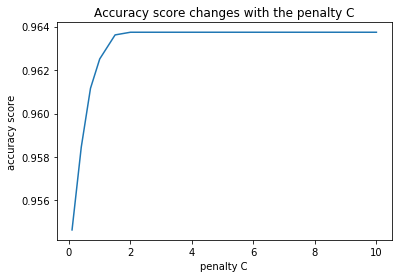

In [108]:
plt.plot(penalty,penalty_score)
plt.xlabel("penalty C")
plt.ylabel("accuracy score")
plt.title("Accuracy score changes with the penalty C")

In [109]:
metrics.accuracy_score(y_test, y_pred)

0.9637413962635202

(-1, 15)

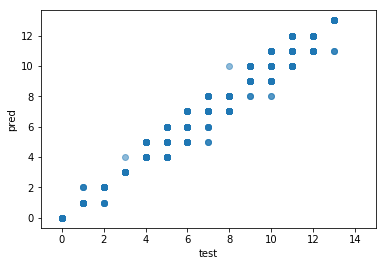

In [112]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('test')
plt.ylabel('pred')
plt.xlim(-1, 15)

'rock':0,'hiphop':1,'pop':2,'metal':3,'indie':4,'rap':5,'punk':6,'country':7,'soul':8, 'folk':9,'electronic':10,'classic rock':11,'jazz':12,'blues':13 

ranked by number of words in each genre